[download scrobbles from this webapp](https://mainstream.ghan.nl/export.html)

In [1]:
from astropy.table import Table
import pandas as pd
from datetime import datetime as dt

In [2]:
import numpy as np

In [3]:
import os

if not os.path.exists('scrobbles.pkl'):
    t = pd.read_json("scrobbles-whitestriper1-1559431603.json")
    scrobbles = dict(artist=[], song=[], time=[], album=[])

    for i in range(t.shape[0]): 
        for j in range(t.shape[1]):
            if t.iloc[i, j] is not None: 
                scrobble = t.iloc[i, j]
                artist = scrobble.get('artist')
                song = scrobble.get('name')
                date = scrobble.get('date')
                album = scrobble.get('album')

                if artist is not None and song is not None and date is not None: 
                    scrobbles['artist'].append(artist.get('#text'))
                    scrobbles['song'].append(song)
                    scrobbles['album'].append(album.get('#text'))
                    scrobbles['time'].append(dt.strptime(date['#text'], "%d %b %Y, %H:%M"))

    dataframe = pd.DataFrame(scrobbles)
    dataframe.to_pickle('scrobbles.pkl')
else: 
    dataframe = pd.read_pickle('scrobbles.pkl')
    dataframe = dataframe.set_index('time')

In [4]:
dataframe = dataframe.sort_index()

In [24]:
mask = dataframe.index > dt(2009, 1, 1)
dataframe = dataframe[mask]

In [127]:
#binned = pd.get_dummies(dataframe['artist']).groupby(pd.TimeGrouper('365D')).sum()
binned = pd.get_dummies(dataframe['artist']).groupby(pd.TimeGrouper('100D')).sum()

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


Text(0, 0.5, 'Songs')

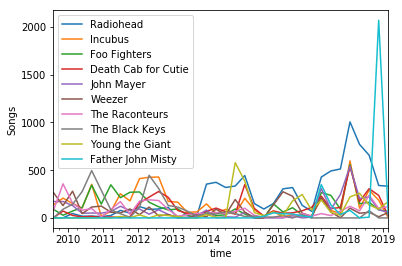

In [144]:
binned[binned.columns[:10]].plot()
plt.ylabel('Songs')

In [128]:
sort = np.argsort(binned.to_numpy().sum(axis=0))

In [129]:
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


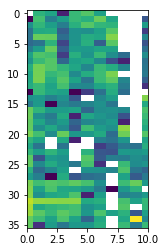

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(np.log(binned.to_numpy()))
plt.xlim([0, 10])
plt.gca().set_aspect(0.5)

In [125]:
binned

,Radiohead,Incubus,Foo Fighters,Death Cab for Cutie,John Mayer,Weezer,The Raconteurs,The Black Keys,Young the Giant,Father John Misty,...,Manchester Orchestra,Copeland,Conrad von der Goltz & Jan Polacek & Kirste Hjort,Con Bro Chill,Marc Broussard,Maurizio Pollini,Mike Posner,Minus the Bear,Mona,"""Weird Al"" Yankovic"
time,,,,,,,,,,,,,,,,,,,,,
2009-07-30,57.0,593.0,285.0,108.0,507.0,710.0,643.0,396.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2010-07-30,76.0,451.0,900.0,36.0,229.0,333.0,267.0,995.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07-30,323.0,1264.0,866.0,327.0,284.0,268.0,524.0,586.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-07-29,253.0,824.0,323.0,679.0,131.0,58.0,330.0,633.0,73.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-29,801.0,266.0,103.0,205.0,108.0,144.0,185.0,129.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-07-29,1201.0,412.0,156.0,550.0,78.0,278.0,204.0,120.0,1023.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07-29,719.0,103.0,254.0,158.0,9.0,557.0,24.0,42.0,146.0,141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-07-28,922.0,313.0,438.0,455.0,372.0,395.0,112.0,32.0,693.0,508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-28,2633.0,719.0,855.0,857.0,1037.0,182.0,292.0,1.0,530.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
